# Fraud detection from Kaggle, link:'https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib notebook

In [2]:
#View data
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Quick look for missing columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
#Quick statistical overview
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### We want to begin with EDA (exploratory data analysis).

In [5]:
#First we see the max time is 172792. The info on the data set says Time corresponds to number of seconds elapsed between 1st 
#transaction and sample transaction
print('The total time elapsed over sample set is {} seconds'.format(max(df.Time)))

The total time elapsed over sample set is 172792.0 seconds


In [6]:
#Show total time in minutes and hours
print('The total time elapsed over sample set is {} minutes'.format(max(df.Time)*(1/60)))
print('The total time elapsed over sample set is {} hours'.format(max(df.Time)*(1/60)*(1/60)))
print('The total time elapsed over sample set is {} days'.format(max(df.Time)*(1/60)*(1/60)*(1/24)))

The total time elapsed over sample set is 2879.866666666667 minutes
The total time elapsed over sample set is 47.99777777777778 hours
The total time elapsed over sample set is 1.9999074074074072 days


### What questions can we ask about the dataset? We have all ready covered the meaning of the Time column. V1-V28 are dimensionless variables given as some reduction process to protect sensitive information on users. Amount is sample transaction dollar value, and class is classifier denoting 1 for 'yes' fraud, 0 'no' fraud

### We are curious to explore the below questions using EDA.

### 1.How do the number of fraud transactions compare to no fraud?
### 2.What does their distribution look like?
### 3.Does the time of hour/day affect number of positive fraud values?
### 4.Are any of our features correlated?
### 5.What is the distribution of fraudulent transactions?


In [7]:
mask = pd.to_datetime(df.Time, unit='s') < '1970-01-02'
mask
df['Day'] = [0 if item==True else 1 for item in mask]
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [8]:
df['Hour'] = pd.to_datetime(df.Time,unit='s').dt.hour

In [9]:
#Reorder columns
first_cols = ['Time','Day','Hour','Class']
feat_cols = [item for item in df.columns if item not in first_cols]
new_cols = first_cols + feat_cols

df = df[new_cols]
df.head()

,Time,Day,Hour,Class,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,0,0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,0,0,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,0,0,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,0,0,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
df.tail()

,Time,Day,Hour,Class,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
284802,172786.0,1,23,0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,1,23,0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1,23,0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,1,23,0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00
284806,172792.0,1,23,0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,...,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00


In [11]:
#Now lets quickly view the split of fraud to no fraud by taking a sum of Class over days
df.groupby('Day')['Class'].sum()

Day
0    281
1    211
Name: Class, dtype: int64

In [12]:
#Or as a percentage
df.groupby('Day')['Class'].sum()/len(df.Class)*100

Day
0    0.098663
1    0.074085
Name: Class, dtype: float64

In [13]:
#We can do the same to Hour to see if there is a difference in time
df.groupby(['Day','Hour'])['Class'].sum()

Day  Hour
0    0        2
     1        2
     2       21
     3       13
     4        6
     5       11
     6        3
     7       23
     8        5
     9       15
     10       2
     11      43
     12       9
     13       9
     14      13
     15      14
     16      14
     17      12
     18      15
     19       7
     20       8
     21      14
     22       3
     23      17
1    0        4
     1        8
     2       36
     3        4
     4       17
     5        0
     6        6
     7        0
     8        4
     9        1
     10       6
     11      10
     12       8
     13       8
     14      10
     15      12
     16       8
     17      17
     18      18
     19      12
     20      10
     21       2
     22       6
     23       4
Name: Class, dtype: int64

In [14]:
df.head()

,Time,Day,Hour,Class,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,0,0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,0,0,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,0,0,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,0,0,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


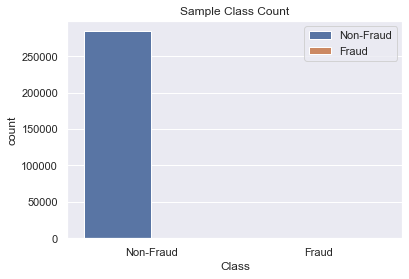

In [15]:
plt.figure()
sns.countplot(x='Class', hue='Class', data=df)
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.legend(['Non-Fraud','Fraud'])
plt.title('Sample Class Count')
plt.show()

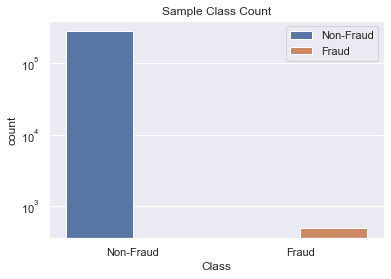

The number of "Fraud" samples is 492.
The number of "Non-fraud" samples is 284315.


In [16]:
#We can see that the number of fraud samples is very small compared to the size of the data set. Let's look at the same plot
#But with a log axis
plt.figure()
sns.countplot(x='Class', hue='Class', data=df)
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.yscale('log')
plt.title('Sample Class Count')
plt.legend(['Non-Fraud','Fraud'])
plt.show()

print('The number of "Fraud" samples is {}.'.format(df.Class.sum()))
print('The number of "Non-fraud" samples is {}.'.format(len(df.Class) - df.Class.sum()))

In [17]:
#The number of fraud samples as a percentage
print('The "fraud" samples make up {:0.2f}% of the dataset.'.format(df.Class.sum()/len(df.Class)*100))

The "fraud" samples make up 0.17% of the dataset.


In [18]:
#We now want to move on to see if their is an affect on day or hour for higher fraud samples
df.groupby(['Day']).Class.sum()

Day
0    281
1    211
Name: Class, dtype: int64

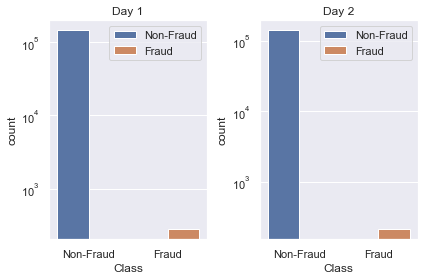

In [19]:
plt.subplot(1,2,1)

sns.countplot(x='Class',hue='Class',data = df[df.Day == 0])
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.yscale('log')
plt.title('Day 1')
plt.legend(['Non-Fraud','Fraud'])

plt.subplot(1,2,2)

sns.countplot(x='Class',hue='Class',data = df[df.Day == 1])
plt.xticks([0,1], ['Non-Fraud', 'Fraud'])
plt.yscale('log')
plt.title('Day 2')
plt.legend(['Non-Fraud','Fraud'])

plt.tight_layout()
plt.show()

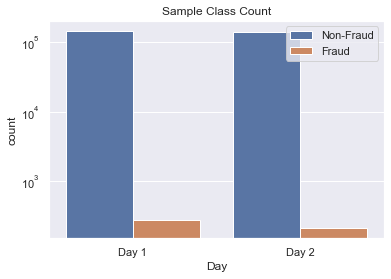

In [20]:
#It is a little hard to see a direct comparison here, so we will compare Fraud only next
sns.countplot(x='Day',hue='Class',data=df)
plt.xticks([0,1], ['Day 1', 'Day 2'])
plt.yscale('log')
plt.title('Sample Class Count')
plt.legend(['Non-Fraud','Fraud'])
plt.show()

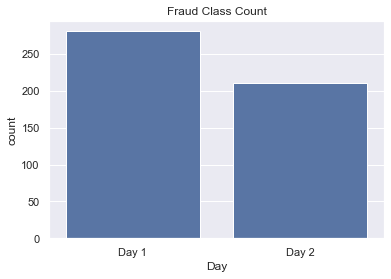

In [21]:
ax = sns.countplot(x='Day', hue='Class', data=df[df.Class==1])
ax.legend_.remove()
plt.xticks([0,1], ['Day 1', 'Day 2'])
plt.title('Fraud Class Count')
plt.show()

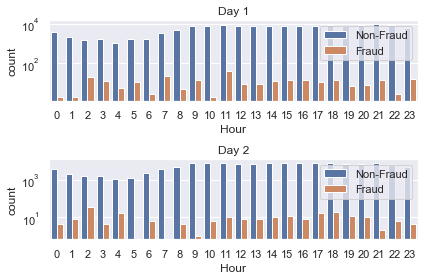

In [22]:
#With a small difference in the days, lets see if the hour of the sample timestamp has more affect
plt.subplot(2,1,1)

sns.countplot(x='Hour',hue='Class',data = df[df.Day == 0])
plt.yscale('log')
plt.title('Day 1')
plt.legend(['Non-Fraud','Fraud'])

plt.subplot(2,1,2)

sns.countplot(x='Hour',hue='Class',data = df[df.Day == 1])

plt.yscale('log')
plt.title('Day 2')
plt.legend(['Non-Fraud','Fraud'])

plt.tight_layout()
plt.show()

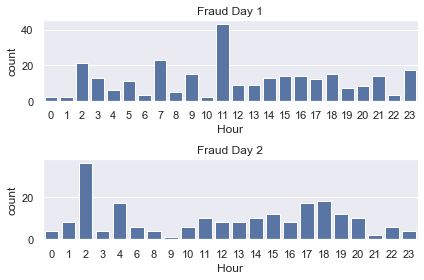

In [122]:
#There is a larger variance here, but again lets key in on the number of fraud samples specifically
plt.subplot(2,1,1)

ax1 = sns.countplot(x='Hour', hue='Class', data=df[(df.Day==0) & (df.Class==1)])
plt.title('Fraud Day 1')
ax1.legend_.remove()

plt.subplot(2,1,2)

ax2 = sns.countplot(x='Hour', hue='Class', data=df[(df.Day==1) & (df.Class==1)])
plt.title('Fraud Day 2')
ax2.legend_.remove()

plt.tight_layout()
plt.show()

### This will be important for later use when we train a machine learning model. Upon first inspection the day did not have much affect on the number of fraud samples, but when split between day and hour it does have an effect on the trend

### Unfortunately the data did not include the details of what days of the week the data is from, so we should not read to much into this, but it makes logical sense that fraud is lower during the morning, trends higher in the afternoon, and then picks back up in the early morning when people are asleep

In [24]:
#We have yet to focus on the amount of the transaction. 

In [25]:
df[df.Class==1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

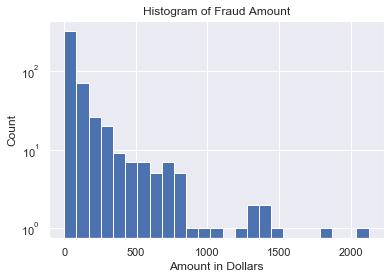

In [26]:
plt.hist(df[df.Class==1].Amount,bins=25)
plt.yscale('log')
plt.title('Histogram of Fraud Amount')
plt.xlabel('Amount in Dollars')
plt.ylabel('Count')
plt.show()

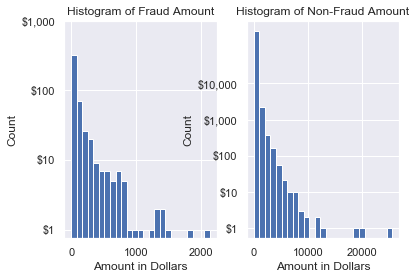

In [27]:
plt.subplot(1,2,1)

plt.hist(df[df.Class==1].Amount,bins=25)
plt.yscale('log')
plt.title('Histogram of Fraud Amount')
plt.xlabel('Amount in Dollars')
plt.ylabel('Count')
plt.yticks([1,10,100,1000],['$1','$10','$100','$1,000'])

plt.subplot(1,2,2)

plt.hist(df[df.Class==0].Amount,bins=25)
plt.yscale('log')
plt.title('Histogram of Non-Fraud Amount')
plt.xlabel('Amount in Dollars')
plt.ylabel('Count')
plt.yticks([1,10,100,1000,10000],['$1','$10','$100','$1,000','$10,000'])

#plt.tight_layout()
plt.show()

### We would like to say from this visual analysis that even though fraud is so small, it has a very similar distribution for price from the above histograms. We must be careful though, because the log scale and binning choice do not always give the whole story.

### Instead lets look at the empirical cumulative distribution function. This will help us estimate the underlying cumulative distribution function of our data, assuming there is some random distribution to sample amount.

In [28]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

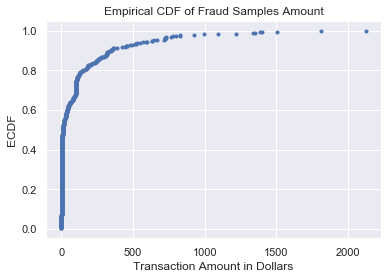

In [29]:
# Compute ECDF for fraud amounts
x_fraud, y_fraud = ecdf(df[df.Class==1].Amount)


plt.plot(x_fraud,y_fraud,marker='.',linestyle='none')
plt.xlabel('Transaction Amount in Dollars')
plt.ylabel('ECDF')
plt.title('Empirical CDF of Fraud Samples Amount')
plt.show()

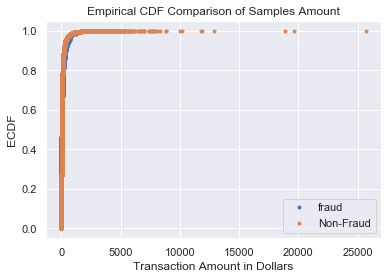

In [30]:
x_fraud, y_fraud = ecdf(df[df.Class==1].Amount)
x_nonfraud,y_nonfraud = ecdf(df[df.Class==0].Amount)

# Generate plot
plt.plot(x_fraud,y_fraud,marker='.',linestyle='none')
plt.plot(x_nonfraud,y_nonfraud,marker='.',linestyle='none')
plt.xlabel('Transaction Amount in Dollars')
plt.ylabel('ECDF')
plt.title('Empirical CDF Comparison of Samples Amount')
plt.legend(['fraud','Non-Fraud'],loc='lower right')
# Display the plot
plt.show()

### It is difficult to see how our empirical CDFs compare between the fraud and non fraud charges, lets try a log scale

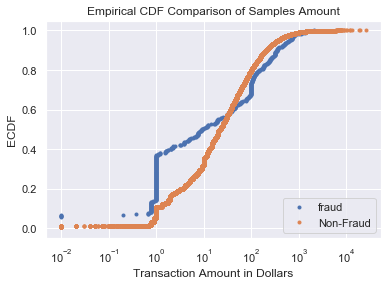

In [31]:
#Lets now compare ecdf for fraud vs non fraud, and use a log scale on the x axis

x_fraud, y_fraud = ecdf(df[df.Class==1].Amount)
x_nonfraud,y_nonfraud = ecdf(df[df.Class==0].Amount)

# Generate plot
plt.plot(x_fraud,y_fraud,marker='.',linestyle='none')
plt.plot(x_nonfraud,y_nonfraud,marker='.',linestyle='none')
plt.xlabel('Transaction Amount in Dollars')
plt.ylabel('ECDF')
plt.xscale('log')
plt.title('Empirical CDF Comparison of Samples Amount')
plt.legend(['fraud','Non-Fraud'],loc='lower right')
# Display the plot
plt.show()

### We can see that the Amounts follow similar trends, but there are many more fraud values around the 10^0 on our log axis. Let's zoom in here.

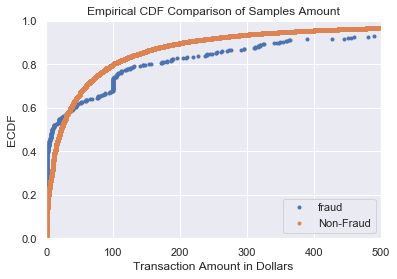

In [32]:
plt.plot(x_fraud,y_fraud,marker='.',linestyle='none')
plt.plot(x_nonfraud,y_nonfraud,marker='.',linestyle='none')
plt.axis((0,500,0,1))
plt.xlabel('Transaction Amount in Dollars')
plt.ylabel('ECDF')
plt.legend(['fraud','Non-Fraud'],loc='lower right')
plt.title('Empirical CDF Comparison of Samples Amount')
# Display the plot
plt.show()

In [33]:
print('The number of fraud transactions over $500 is {}.'.format(df[(df.Class==1)&(df.Amount > 500)].Class.sum()))
print('This is {:.2f}% of all fraud charges.'.format(df[(df.Class==1)&(df.Amount > 500)].Class.sum()/df.Class.sum()*100))

The number of fraud transactions over $500 is 35.
This is 7.11% of all fraud charges.


### We have visually explored how the number of fraud samples varies by day, as well as by day and hour of the day. We then moved on to explore how the distribution of sample charge amounts compared between Fraud and Non-Fraud samples. Shown by the above graphs we can see that the empirical CDF of the Amount column of the Fraud charges differs slightly from the Non-Fraud. This fits into a logical view of fraud charges, as one would not expect someone to make excessively large charges if they were using a credit card illegally. We also show this by taking calculating the percent of fraud samples that have an amount of 500 or more.

### Next we wish to explore trends and graphs that visualize the two classes of fraud, the time they were made, and how much they were. What does the ECDF look like around 100 dollars? How does the time of day, or the day the transaction took place play a role in our data?

In [34]:
df.head()

,Time,Day,Hour,Class,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,0,0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,0,0,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,0,0,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,0,0,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


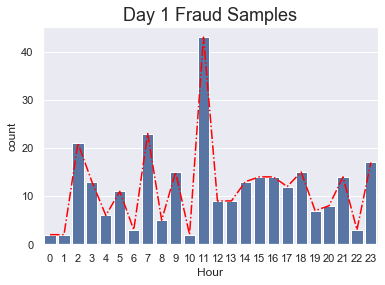

In [35]:
#We can combine our bar plots with line plots, here we have to add order to our countplot so that it displays the hours where
#count had a value of 0
df[df['Day']==0].groupby('Hour')['Class'].sum().plot(c='red',linestyle='-.',label='_nolegend_')
ax = sns.countplot(x='Hour', hue='Class', data=df[(df.Day==0) & (df.Class==1)],order = list(range(0,24)))
ax.legend_.remove()
plt.title('Day 1 Fraud Samples',size=18)
plt.show()

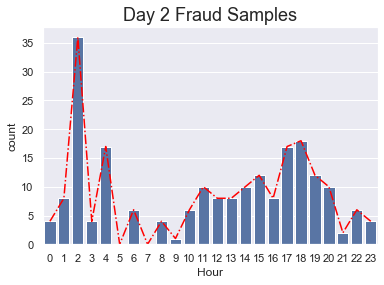

In [36]:
df[df['Day']==1].groupby('Hour')['Class'].sum().plot(c='red',linestyle='-.',label='_nolegend_')
ax = sns.countplot(x='Hour', hue='Class', data=df[(df.Day==1) & (df.Class==1)],order = list(range(0,24)))
ax.legend_.remove()
plt.title('Day 2 Fraud Samples',size=18)
plt.show()

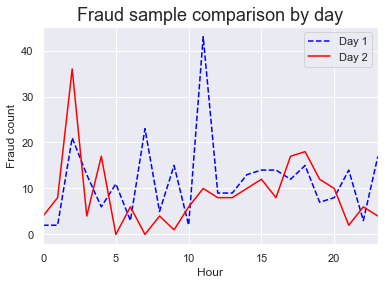

In [37]:
#The line plot allows us to compare the days directly, since multiple bar graphs are not ideal
df[df['Day']==0].groupby('Hour')['Class'].sum().plot(c='blue',linestyle='--',label='Day 1')
df[df['Day']==1].groupby('Hour')['Class'].sum().plot(c='red',label='Day 2')
plt.xlabel('Hour')
plt.ylabel('Fraud count')
plt.legend()
plt.title('Fraud sample comparison by day',size=18)
plt.show()



### We now wish to explore the Amount column of the data. To do so we will make several comparisons for the amount of charges organized by the hour. We will look at the max, min, and average per hour given different aspects such as day of charge, as well as fraud and non-fraud.

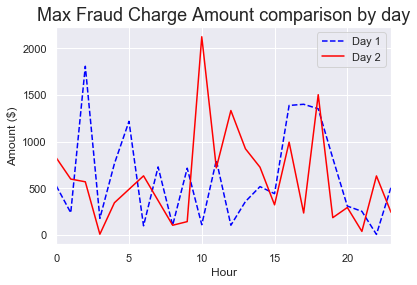

In [38]:
#Lets now explore the hourly plot of max amount charged for fraud charges by using groupby call and comparing days
df[(df['Day']==0)&(df['Class']==1)].groupby('Hour')['Amount'].max().plot(c='blue',linestyle='--',label='Day 1')
df[(df['Day']==1)&(df['Class']==1)].groupby('Hour')['Amount'].max().plot(c='red',label='Day 2')
plt.xlabel('Hour')
plt.ylabel('Amount ($)')
plt.legend()
plt.title('Max Fraud Charge Amount comparison by day',size=18)
plt.show()

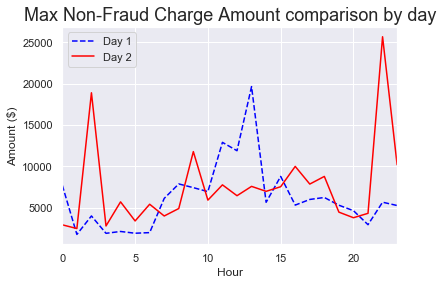

In [39]:
#Repeat for non-fraud class
df[(df['Day']==0)&(df['Class']==0)].groupby('Hour')['Amount'].max().plot(c='blue',linestyle='--',label='Day 1')
df[(df['Day']==1)&(df['Class']==0)].groupby('Hour')['Amount'].max().plot(c='red',label='Day 2')
plt.xlabel('Hour')
plt.ylabel('Amount ($)')
plt.legend()
plt.title('Max Non-Fraud Charge Amount comparison by day',size=18)
plt.show()

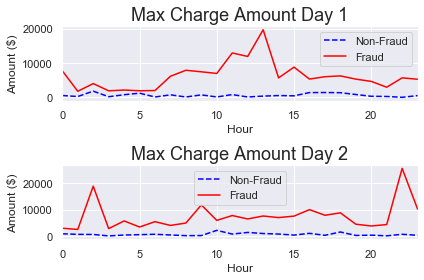

In [40]:
#Lets now compare max fraud to the non-fraud class, again per hour. We create a plot for each day
plt.subplot(2,1,1)
df[(df['Day']==0)&(df['Class']==1)].groupby('Hour')['Amount'].max().plot(c='blue',linestyle='--',label='Non-Fraud')
df[(df['Day']==0)&(df['Class']==0)].groupby('Hour')['Amount'].max().plot(c='red',label='Fraud')
plt.xlabel('Hour')
plt.ylabel('Amount ($)')
plt.legend()
plt.title('Max Charge Amount Day 1',size=18)

plt.subplot(2,1,2)
df[(df['Day']==1)&(df['Class']==1)].groupby('Hour')['Amount'].max().plot(c='blue',linestyle='--',label='Non-Fraud')
df[(df['Day']==1)&(df['Class']==0)].groupby('Hour')['Amount'].max().plot(c='red',label='Fraud')
plt.xlabel('Hour')
plt.ylabel('Amount ($)')
plt.legend()
plt.title('Max Charge Amount Day 2',size=18)

#plt.figure(figsize=(15,1))
#plt.set_size_inches=(12,12)
plt.tight_layout()
plt.show()

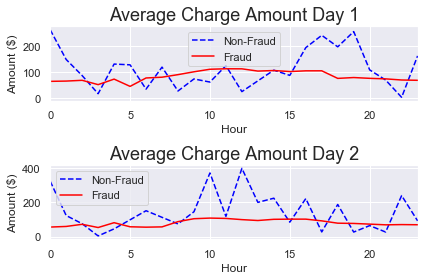

In [41]:
#We can do the same for the average
plt.subplot(2,1,1)
df[(df['Day']==0)&(df['Class']==1)].groupby('Hour')['Amount'].mean().plot(c='blue',linestyle='--',label='Non-Fraud')
df[(df['Day']==0)&(df['Class']==0)].groupby('Hour')['Amount'].mean().plot(c='red',label='Fraud')
plt.xlabel('Hour')
plt.ylabel('Amount ($)')
plt.legend()
plt.title('Average Charge Amount Day 1',size=18)

plt.subplot(2,1,2)
df[(df['Day']==1)&(df['Class']==1)].groupby('Hour')['Amount'].mean().plot(c='blue',linestyle='--',label='Non-Fraud')
df[(df['Day']==1)&(df['Class']==0)].groupby('Hour')['Amount'].mean().plot(c='red',label='Fraud')
plt.xlabel('Hour')
plt.ylabel('Amount ($)')
plt.legend()
plt.title('Average Charge Amount Day 2',size=18)

#plt.figure(figsize=(15,1))
#plt.set_size_inches=(12,12)
plt.tight_layout()
plt.show()

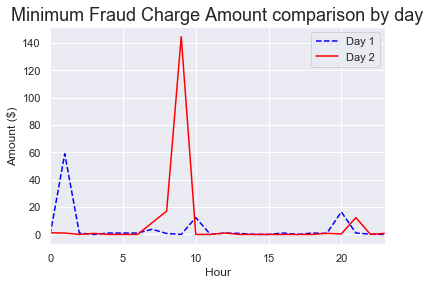

In [42]:
#Lets now explore the hourly plot of minimum amount charged for fraud charges by using groupby call and comparing days
df[(df['Day']==0)&(df['Class']==1)].groupby('Hour')['Amount'].min().plot(c='blue',linestyle='--',label='Day 1')
df[(df['Day']==1)&(df['Class']==1)].groupby('Hour')['Amount'].min().plot(c='red',label='Day 2')
plt.xlabel('Hour')
plt.ylabel('Amount ($)')
plt.legend()
plt.title('Minimum Fraud Charge Amount comparison by day',size=18)
plt.show()

### Should we trust this? At first glance one would assume it is showing zero because there is no minimum value for that hour, but that does not make sense. There should be no way for the minimum to be zero, as there should be no fraud charges that had an amount of zero. Lets look into our data and see how many charges are listed as zero. 

In [43]:
#Remove samples with Amounts equal to zero
df1 = df[df['Amount']!=0]
df1[(df1['Day']==0)&(df1['Class']==1)].groupby('Hour')['Amount'].min()

Hour
0     529.00
1      59.00
2       1.00
3       1.00
4       1.00
5       1.00
6       1.00
7       3.76
8       0.68
9       0.76
10     12.31
11      0.76
12      1.00
13      0.76
14      0.76
15      0.01
16      1.00
17      1.00
18      1.00
19      0.76
20     16.48
21      1.00
22      0.20
23      1.00
Name: Amount, dtype: float64

In [44]:
print('There are {} charges that have an amount of $0.'.format(df[df['Amount']==0]['Amount'].count()))

There are 1825 charges that have an amount of $0.


In [45]:
print('Out of the 1825 charges of $0, {} are in the Fraud class.'.format(df[df['Amount']==0]['Class'].sum()))

Out of the 1825 charges of $0, 27 are in the Fraud class.


### With the size of the data we could drop these, but it would only further hurt the small sampling of the fraud class. We will get into it later, but these charges of zero dollars could be there due to a decline or cancelation. If we assumed that, without more knowledge of the features V1,V2,V3, etc we don't want to discard these values in our later statistical analysis or machine learning model. For now, I will create the minimum graphs with Amounts greater than 1 dollar. Then I will go back to working with the full data set.

In [46]:
df1.head()

,Time,Day,Hour,Class,V1,V2,V3,V4,V5,V6,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,0,0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,0,0,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,0,0,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,0,0,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [47]:
df1 = df[df['Amount']>1]
df1[(df1['Day']==0)&(df1['Class']==1)].groupby('Hour')['Amount'].min()

Hour
0     529.00
1      59.00
2       1.10
3      30.39
4       3.79
5     188.78
6       3.12
7       3.76
8      30.30
9       1.52
10     12.31
11      1.52
12     24.90
13      7.58
14      1.18
15      1.79
16      1.75
17      1.10
18      7.53
19      3.79
20     16.48
21     60.00
22      7.57
23      2.00
Name: Amount, dtype: float64

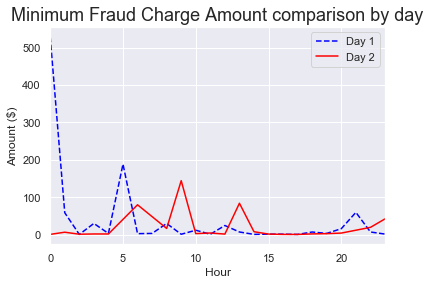

In [48]:
#Lets now explore the hourly plot of minimum amount charged for fraud charges by using groupby call and comparing days
df1[(df1['Day']==0)&(df1['Class']==1)].groupby('Hour')['Amount'].min().plot(c='blue',linestyle='--',label='Day 1')
df1[(df1['Day']==1)&(df1['Class']==1)].groupby('Hour')['Amount'].min().plot(c='red',label='Day 2')
plt.xlabel('Hour')
plt.ylabel('Amount ($)')
plt.legend()
plt.title('Minimum Fraud Charge Amount comparison by day',size=18)
plt.show()

### There seems to be a slight difference in Fraud samples split between day and hour. An advantageous way to visualize some of these trends is box-plots. We will again rely on the Seaborn library here.

In [49]:
df[(df['Day']==0)&(df['Class']==1)].groupby('Hour').describe()

Time                                                                   \
     count          mean          std      min       25%      50%       75%   
Hour                                                                          
0      2.0    439.000000    46.669048    406.0    422.50    439.0    455.50   
1      2.0   5724.000000  1784.737516   4462.0   5093.00   5724.0   6355.00   
2     21.0   8174.047619   544.708773   7519.0   7610.00   8169.0   8614.00   
3     13.0  12339.923077  1067.315203  11080.0  11629.00  12095.0  13126.00   
4      6.0  17135.333333   692.605419  15817.0  17195.25  17225.0  17447.50   
5     11.0  19800.363636  1166.065888  18088.0  18682.50  20011.0  20691.00   
6      3.0  23985.000000  2012.436086  21662.0  23378.50  25095.0  25146.50   
7     23.0  27239.478261  1085.955041  25231.0  26709.00  27163.0  28192.50   
8      5.0  29889.400000   551.500952  29526.0  29531.00  29753.0  29785.00   
9     15.0  35004.066667  1118.763314  32686.0  34577.50  35585.0  35902.50   
10     2.0  36668.500000   704.985461  36170.0  36419.25  36668.5  36917.75   
11    43.0  41386.883721   670.401415  39729.0  41155.50  41273.0  41626.50   
12     9.0  44944.333333  1041.830240  43369.0  44393.00  45463.0  45541.00   
13     9.0  48220.333333   874.101539  46925.0  47826.00  47982.0  48533.00   
14    13.0  52426.461538  1235.797422  50706.0  51135.00  52934.0  53451.00   
15    14.0  56192.142857   776.638007  54846.0  55615.00  56361.0  56866.75   
16    14.0  59098.000000   953.494141  58060.0  58218.25  58916.5  59750.00   
17    12.0  63234.916667  1182.194143  61646.0  62267.50  63022.5  64419.75   
18    15.0  67241.400000  1188.434192  65358.0  65986.50  67857.0  68207.00   
19     7.0  70337.285714   538.710718  69394.0  70150.00  70270.0  70682.00   
20     8.0  74143.750000  1221.753278  72327.0  73262.00  74210.5  75163.75   
21    14.0  76981.142857   687.458290  75851.0  76830.75  76871.5  77179.25   
22     3.0  81067.000000  1399.649599  79540.0  80456.00  81372.0  81830.50   
23    17.0  85047.647059   715.004803  83934.0  84204.00  85285.0  85573.00   

                Day       ...       V28           Amount              \
          max count mean  ...       75%       max  count        mean   
Hour                      ...                                          
0       472.0   2.0  0.0  ... -0.008996  0.035764    2.0  264.500000   
1      6986.0   2.0  0.0  ...  0.598923  0.849573    2.0  149.465000   
2      9064.0  21.0  0.0  ...  0.404474  0.890780   21.0   87.132381   
3     14152.0  13.0  0.0  ...  0.789687  1.108933   13.0   16.926923   
4     17838.0   6.0  0.0  ...  0.053145  0.720056    6.0  131.710000   
5     21419.0  11.0  0.0  ... -1.286675 -0.775036   11.0  128.788182   
6     25198.0   3.0  0.0  ...  0.300718  0.527831    3.0   34.703333   
7     28755.0  23.0  0.0  ...  0.465330  0.511423   23.0  119.903478   
8     30852.0   5.0  0.0  ...  0.311177  0.402400    5.0   27.430000   
9     35953.0  15.0  0.0  ...  0.525495  0.691195   15.0   74.052667   
10    37167.0   2.0  0.0  ... -0.223613  0.219380    2.0   62.005000   
11    43028.0  43.0  0.0  ...  0.238079  1.130625   43.0  125.437907   
12    46149.0   9.0  0.0  ...  0.137843  0.293426    9.0   24.987778   
13    49985.0   9.0  0.0  ...  0.250134  0.356958    9.0   66.685556   
14    53937.0  13.0  0.0  ...  0.229301  0.319918   13.0  108.066923   
15    57163.0  14.0  0.0  ...  0.332166  0.470434   14.0   87.848571   
16    61108.0  14.0  0.0  ...  0.398158  0.821215   14.0  195.331429   
17    64785.0  12.0  0.0  ...  0.250360  0.677664   12.0  243.031667   
18    68357.0  15.0  0.0  ...  0.939407  0.939407   15.0  198.504000   
19    71033.0   7.0  0.0  ...  0.288165  0.459623    7.0  257.455714   
20    75581.0   8.0  0.0  ...  0.344023  0.803163    8.0  109.156250   
21    78725.0  14.0  0.0  ...  0.404216  0.835395   14.0   69.800714   
22    82289.0   3.0  0.0  ...  0.200330  0.223924    3.0    2.923333   


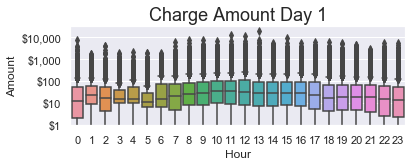

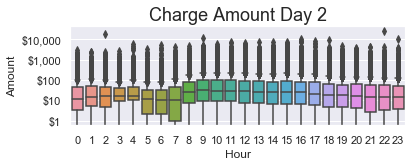

<Figure size 432x288 with 0 Axes>

In [50]:
#Here we will take advantage of seaborn's ability to perform groupby in the background, and compare our amounts in boxplot
#We have set the y-axis to log scale so that we may visualize the quartiles for each day
plt.figure()
plt.subplot(2,1,1)

sns.boxplot(x='Hour',y='Amount',data=df[df['Day']==0])
plt.yscale('log')
plt.yticks([1,10,100,1000,10000],['$1','$10','$100','$1,000','$10,000'])
plt.title('Charge Amount Day 1',size=18)
plt.show()

plt.subplot(2,1,2)

sns.boxplot(x='Hour',y='Amount',data=df[df['Day']==1])
plt.yscale('log')
plt.yticks([1,10,100,1000,10000],['$1','$10','$100','$1,000','$10,000'])
plt.title('Charge Amount Day 2',size=18)
plt.show()

plt.tight_layout()
plt.show()

### As given at the data source, we do not know much about the origin of the columns V1 through V28 (we will refer to them as the V Columns from this point on). The V Columns take on numerical values, and they appear to be stripped of any information that could link to personal banking information. This will make our job here more difficult. We now wish to perform EDA on the V Columns.

In [51]:
#As always, a good first step is to use the pandas .describe() and .info() functions to explore our data
#Lets cut down our data frame to be the class and V Columns only
V_drop = ['Time','Day','Hour','Amount']
dfV = df.drop(V_drop,axis=1)
dfV.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


### We wish to expand on the idea of a scatter_matrix plot. This is shown below using the famous Iris dataset. This function will compare the ECDF of different classes for multiple columns. On the diagonal we will have a boxplot of the column, and on the off diagonal we will compare the two columns ECDF.

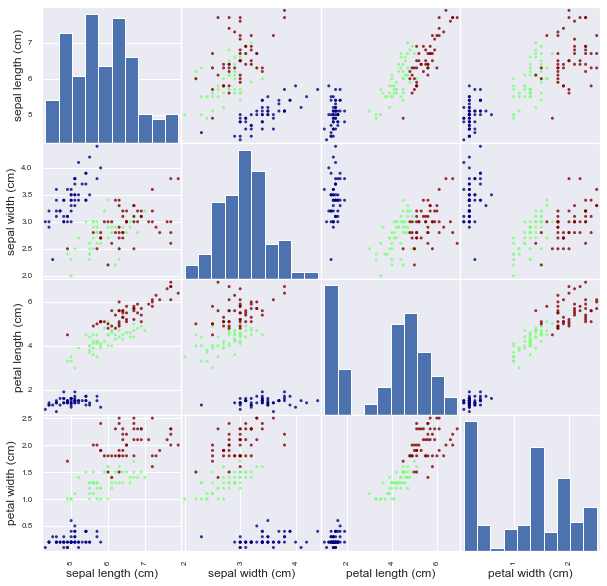

In [52]:
from sklearn import datasets
from pandas.plotting import scatter_matrix

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

scatter_matrix(iris_df.drop('species',axis=1), alpha=0.8, figsize=(10, 10),c=iris_df['species'],cmap='jet')
plt.show()

### We will first look at boxplots for the different V Columns values

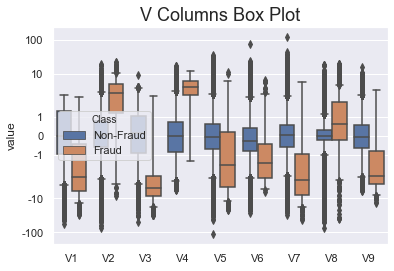

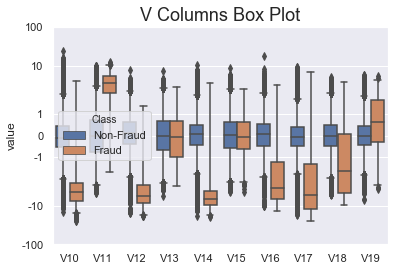

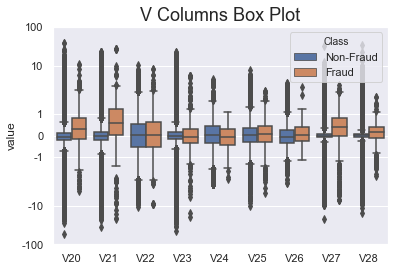

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667


In [53]:
dfV_1_9_melt = pd.melt(dfV.iloc[:,np.r_[0,1:10]],id_vars=['Class'],var_name='V_col')
dfV_10_19_melt = pd.melt(dfV.iloc[:,np.r_[0,10:20]],id_vars=['Class'],var_name='V_col')
dfV_20_28_melt = pd.melt(dfV.iloc[:,np.r_[0,20:29]],id_vars=['Class'],var_name='V_col')

plt.figure()
ax = sns.boxplot(data=dfV_1_9_melt,x='V_col',y='value',hue='Class')
legend = ax.legend_

for t, l in zip(legend.texts,('Non-Fraud','Fraud')):
    t.set_text(l)

plt.yscale('symlog')
plt.yticks([-100,-10, -1,0,1,10,100],['-100','-10', '-1','0','1','10','100'])
plt.title('V Columns Box Plot',size=18)
plt.xlabel('')
plt.show()

#Do the same for other V Columns
plt.figure()
ax = sns.boxplot(data=dfV_10_19_melt,x='V_col',y='value',hue='Class')

legend = ax.legend_

for t, l in zip(legend.texts,('Non-Fraud','Fraud')):
    t.set_text(l)

plt.yscale('symlog')
plt.yticks([-100,-10, -1,0,1,10,100],['-100','-10', '-1','0','1','10','100'])
plt.title('V Columns Box Plot',size=18)
plt.xlabel('')
plt.show()



plt.figure()
ax = sns.boxplot(data=dfV_20_28_melt,x='V_col',y='value',hue='Class')

legend = ax.legend_

for t, l in zip(legend.texts,('Non-Fraud','Fraud')):
    t.set_text(l)

plt.yscale('symlog')
plt.yticks([-100,-10, -1,0,1,10,100],['-100','-10', '-1','0','1','10','100'])
plt.title('V Columns Box Plot',size=18)
plt.xlabel('')
plt.show()

dfV.groupby('Class').mean()

### We can see from our box plots and the above groupby call that for most of the non-Fraud V Columns the mean is close to zero, while the Fraud tend to be offset between -10 and 10. At first glance this would be great news, but as always we should be wary to take it at face value due to several factors. Firstly, we have used a log scale and there are quite a few 'outliers' (being loose in our definition) outside of the whiskers. This may not be a true indication that the distributions for Fraud vs non-Fraud are that different. We may get a better understanding by looking at the ECDF between the two classes for the V Columns

### The process for graphing and comparing multiple ECDFs can be automated into a function. By the end I would like to take a dataframe, split it by class and create a new dataframe for each class that holds the ECDF information. From there it should take these new ECDF dataframes and create a figure that has subplots for all features involved, where we compare between the two classes. The left subplots will show histograms for a given feature, and the right will compare distributions in their ECDF form between the involved classes. We will require the first column in the input data frame is the Class column.

In [54]:
#Split V Columns into smaller groups
dfV_1_9 = dfV.iloc[:,np.r_[0,1:10]]
dfV_10_19 = dfV.iloc[:,np.r_[0,10:20]]
dfV_20_28 = dfV.iloc[:,np.r_[0,20:29]]

In [55]:
#We will create this function to produce a dataframe that includes the empircal cumulative distribution function
#of all columns of an input dataframe. It will be helpful in comparing multiple columns statistical distributions in a
#data set of interest
def ecdf_df(df_in):
    fill_dict = {}
    for item in df_in:
        x_hold, y_hold = ecdf(df_in[item])
        fill_dict['x_{}'.format(item)] = x_hold
        fill_dict['y_{}'.format(item)] = y_hold
    ecdf_df = pd.DataFrame(fill_dict)
    
    return ecdf_df

In [56]:
#This small function automates breaking data into smaller dataframes based on the different class options a sample may take.
#We do this by creating a list of dataframes, where the number of items in the list is the same as the number of classes the
#data may take.

#Initialize an empty array
def unique_class_df(df):
    class_split_df = []
    class_names = df.Class.unique()
    for item in class_names:
        class_split_df.append(df[df.Class==item])
    return class_split_df

In [57]:
def ecdf_compare(df):
    #Create a list of dataframes, seperating the classes
    split_df = unique_class_df(df)
    
    #initialize empty list to contain new ecdf dataframes for each class in split_df list(i.e. their length should be the same)
    ecdf_split_df = []
    for df_class in split_df:
          ecdf_split_df.append(ecdf_df(df_class.drop('Class',axis=1)))
    
    column_names = df_class.drop('Class',axis=1).columns

    #Now for each ecdf dataframe spanning our classes we would like to create lists for the x and y columns of the ECDF
    class_dict = {}
    class_numb = 0
    for df_class in ecdf_split_df:
        data = df_class
        M = int(data.shape[1]/2)

        hold_list = []
        for ii in range(M):
            hold_list.append(data.iloc[:,ii*2:ii*2+2].values)
        
        class_dict['Class_{}'.format(class_numb)] = hold_list
        
        class_numb +=1
    
    ###########################
    ### class_dict is now a dictionary for each class that contains M arrays. The arrays should be of two columns, the first
    ### entry is the feature value (or x of the ecdf), while the second entry is the y value of the ecdf. Y should take on a 
    ### range of 0 to 1.
    
    M = len(class_dict['Class_0'])
    fig, axes = plt.subplots(M,2,figsize=(10, M*3))
   
    
    for ii in range(M):
        hist0 = class_dict['Class_0'][ii][:,0]
        hist1 = class_dict['Class_1'][ii][:,0]

        axes[ii,0].hist([hist0,hist1],bins = 20,density = True,alpha=.8,label = ['Class 0', 'Class 1'])
        axes[ii,0].legend(loc='upper left')
        axes[ii,0].set_ylabel('Fraction of Data')
        axes[ii,0].set_title(column_names[ii],rotation='vertical',x=-0.3,y=0.5,size=18)
        
        x_0 = class_dict['Class_0'][ii][:,0]
        y_0 = class_dict['Class_0'][ii][:,1]
                
        x_1 = class_dict['Class_1'][ii][:,0]
        y_1 = class_dict['Class_1'][ii][:,1]
                
        axes[ii,1].plot(x_0,y_0,marker='.',linestyle='none',label = 'Class 0')
        axes[ii,1].plot(x_1,y_1,marker='.',linestyle='none',label = 'Class 1')
        axes[ii,1].set_ylabel('Fraction of Data')
        
      
    
    plt.tight_layout()
    plt.show()

### We have our tool to make multiple ECDF plots from a dataframe now. We will use it to analyze our feature set that we have all ready split into batches dfV_1_9, dfV_10_19, dfV_20_28.

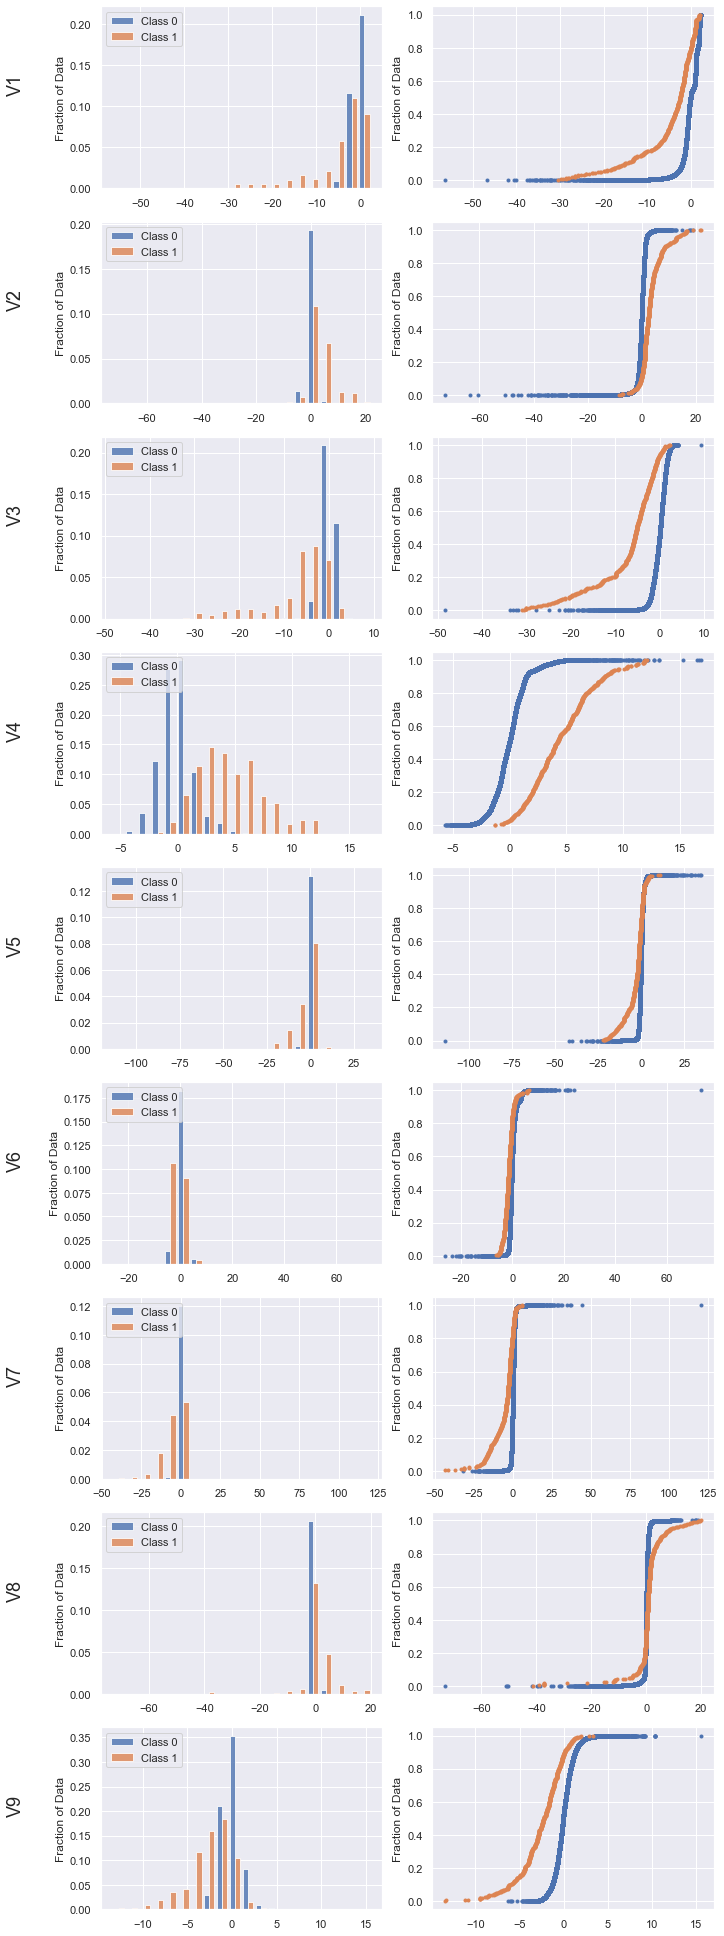

In [58]:
ecdf_compare(dfV_1_9)

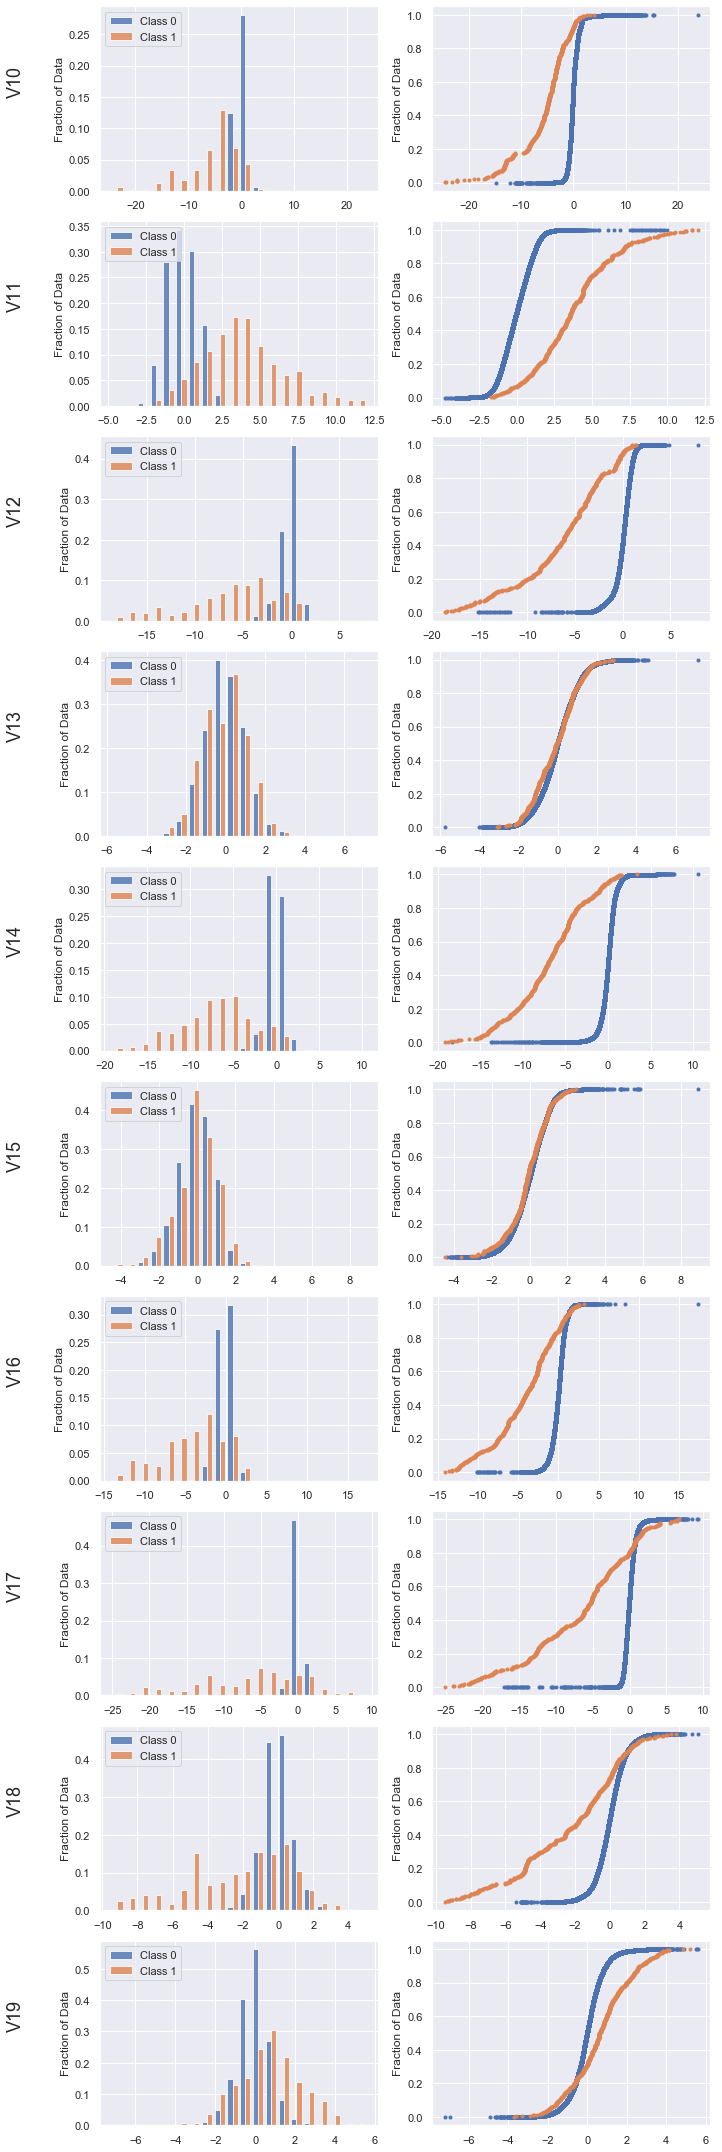

In [59]:
ecdf_compare(dfV_10_19)

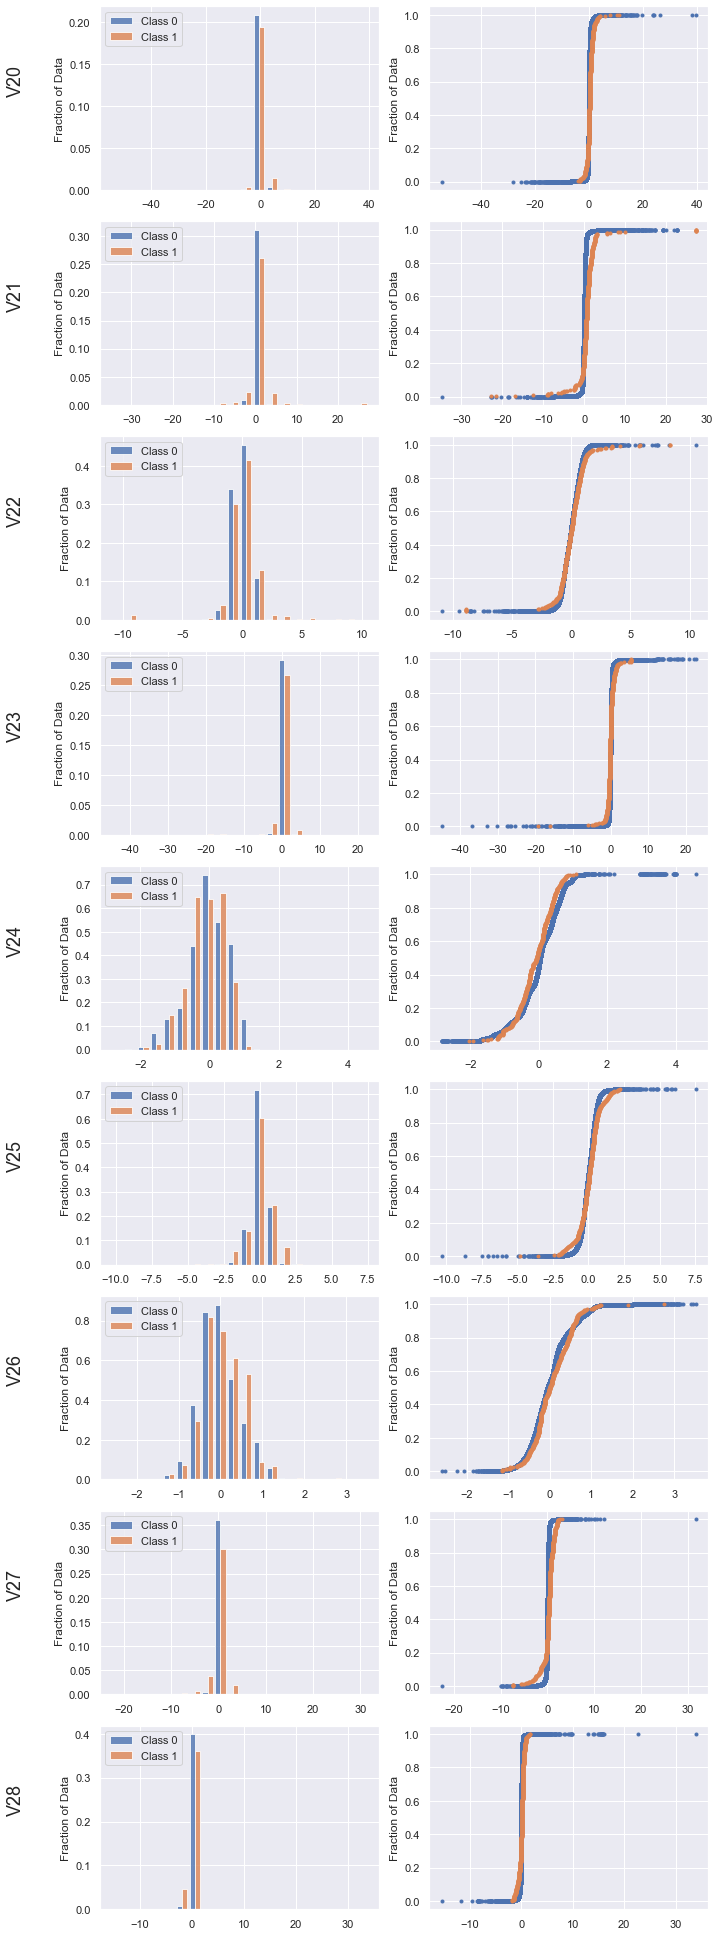

In [60]:
ecdf_compare(dfV_20_28)

### This is very useful. We can now visually compare the distributions for each V feature between our Fraud and Non-Fraud class. We have left the Class 0 and Class 1 names in our legends due to our ECDF tool being designed for a broader purpose than just this sample work. We can see that roughly half of our features distributions match between our two classes, while the other half has noticeable deviation. This will play an important role in choosing our learning model in the future, as we will need to be strategic in which one we choose. Specifically keeping in mind feature scaling/normalization for logistic regression. We may experience some information loss by normalizing the features that have large difference between classes. For this we will experiment between logistic regression and random forest for this problem.

### Before we move on to building a learning model we should still look at the correlation between our features.

In [61]:
df_all_features = df.drop(['Time','Day','Hour','Class'],axis=1)

In [62]:
df_features_corr = df_all_features.corr(method='pearson')

In [63]:
df_features_corr[df_features_corr > 0.01]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098732
V5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215981
V7,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.397311
V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


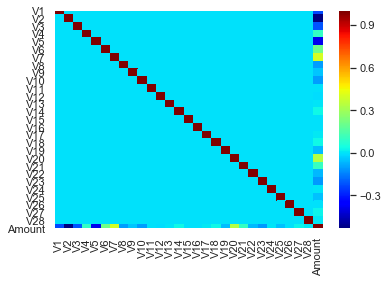

In [64]:
sns.heatmap(df_features_corr,xticklabels = df_features_corr.columns, yticklabels = df_features_corr.columns,cmap='jet')
plt.show()

### We have used the Pearson Correlation to visualize how correlated our feature set is. The correlation takes a value between -1 and 1, where 0 indicates no correlation. The V Columns have almost no correlation to each other, where we only see significant correlation between several of the V Columns and the amount, the strongest being between Amount and V20/V7 for a value of roughly 0.3.

### It is time to create our first model. This problem is a binary classification problem, and we plan on testing logistic regression and random forest models.

In [65]:
#We will use the Scikit-Learn library, and as always we will split our data into X, the features, and y our target
from sklearn.model_selection import train_test_split

# X = df_all_features.values
# X = df.Amount.values
X = df.Amount.values.reshape(-1,1)
y = df.Class.values

In [66]:
#This probably gets ahead of ourselves, but first lets just do a basic split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=42)

### We will first use a basic logistic regression classifier to get a benchmark on accuracy, then move onto using random forest classifiers. Using Scikit-Learn we will choose the 'lbfgs' solver that uses L2 regularization, that is it adds a penalty to the coefficients used in the model by shrinking the sum of the squares of coefficients used.

In [67]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',max_iter = 1000)

# Fit the classifier to the training data
clf.fit(X_train,y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test,y_test)))

Accuracy: 0.9982678510820079


### Great! We have over 99% accuracy!

### This accuracy however is somewhat misleading, and we would not know if we had not performed in depth EDA. From the above work we know there are over 280 thousand samples in this dataset, with only roughly 500 being fraud that we are trying to detect. If we look at calculations done above this is only 0.17% being fraud transactions. With sparse samples like this we have a special kind of classification problem.

### There is quite a bit of literature out there on this subject. In a binary classifier problem where one class greatly outnumbers the other the basic accuracy test will not work. This is because it compares the prediction to the actual class, and calls accuracy the number predicted correctly over the total number tested. If a class is highly under represented, we could just always classify it as non-fraud and still boast a high accuracy due to that class making up 99% of the samples.

### For this problem, we will instead try log loss (sometimes called cross entropy) for binary classification. This type of metric takes into account not only the predicted class, but also the probability of that prediction (found from most model's voting/classifying process). We won't cover the nity-gritty hear, but ideally we wish to have a small log loss score, where exactly zero is perfect classification. Log loss benefits from penalizing incorrect classifications with high probability, or better said wrong and confident. Scikit-Learn has a built in test for this, we only need input what the production should be, y_test, and the probability our model gives for predicting fraud (or 1 in our binary classification).

In [68]:
from sklearn.metrics import log_loss

clf_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)
score = log_loss(y_test,clf_probs[:,1])
print('The log loss score is {}.'.format(score))

The log loss score is 0.012733229588470493.


### This accuracy still seems to good to be true, lets look at the confusion matrix. Seen below we predicted zero Fraud samples, but the imbalance keeps log loss low.

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[85295,     0],
       [  148,     0]], dtype=int64)

In [70]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,85295,85295
1,148,148
All,85443,85443


### With the Fraud class being highly under represented we may need to experiment with other scoring types. From the confusion matrix lets instead try the Receiver operator characteristic area under curve (ROC AUC), which compares the true positive rate to the false positive rate for varying thresholds. 

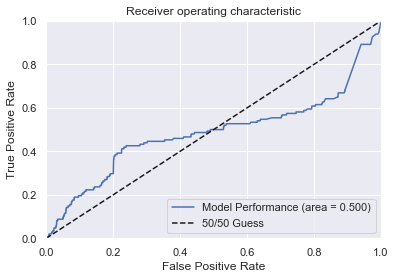

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

clf_auc_score = roc_auc_score(y_test,y_pred)
#print('The ROC AUC Score is {}.'.format(clf_auc_score))

fpr, tpr, _ = roc_curve(y_test,clf_probs[:,1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Model Performance (area = {:.3f})'.format(clf_auc_score),'50/50 Guess'],loc='lower right')
plt.title('Receiver operating characteristic')
plt.show()

### It is still suspect that some of the accuracy is so good. I have experimented by simplifying our model to be a single feature and our classes and rerunning the test. The feature is the dollar amount. I do this, because the model scoring should suffer, but accuracy and log loss still indicate our model has good performance in classification. Our ROC AUC test however did take a big hit, and suffers due to lack of features. The model has then suffered, and is as efficient as a 50/50 guess. This can be seen in the score of 0.5, and the graph where the blue line from our model straddles the center line of the ROC graph.

### We will now proceed by scoring with ROC AUC. We briefly discussed the imbalance of class representation. To mitigate this we need to deal with the imbalance of the classes. This can be done using different sampling techniques, in this problem we will oversample the Fraud class in an effort to gain efficiency in training our model. We import our preprocessing over-sampler from Imblearn library. We tested scoring using RandomOverSampler and SMOTE, and in the end chose SMOTE for its slightly higher performance. When used as preprocessing for the Logistic Regression model we found the ROC AUC went from an area of 0.50 to 0.51 with RandomOverSampling, and to 0.52 with SMOTE.

### Next we wish to use a grid search with a Random Forest model. The ROC AUC scoring will continue to be used. Accuracy and log loss give incomplete pictures of model performance due to our under-represented Fraud class, not model choice. In preparation we split our dataset into a training set and holdout, so that we can perform cross validation on the training set while keeping never before seen holdout data from the model.

In [72]:
# Lets first split our data from the original dataframe to have a holdout data set before exploring resampling methods

df_train, holdout = train_test_split(df.drop('Time',axis=1), test_size=0.2,random_state=31)

print('The number of fraud transactions in train data is {}.'.format(df_train.Class.sum()))

print('The number of fraud transactions in holdout data is {}.'.format(holdout.Class.sum()))

The number of fraud transactions in train data is 390.
The number of fraud transactions in holdout data is 102.


In [73]:
# Create X and y for our new data

X = df_train.drop('Class',axis=1)
y = df_train.Class

### The Random Forest and preprocessing can be put into a pipeline, where the first step is balancing the classes and the second step is a random forest classifier. We choose the forest model because it will be able to help explore how important each feature is in the model, fit from the learning model. If we remember our EDA with our empirical cumulative distribution functions and the lack of background on the V Columns, understanding which features hold significance will be of great value.

In [74]:
# We now wish to build a pipeline. The first step will to be to use oversampling to help our imbalanced data. Then, we will 
# use the logistic regression classifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


#ros = RandomOverSampler(random_state=42,sampling_strategy='minority')

clf = RandomForestClassifier(n_estimators=20,max_depth=20,max_features=4, random_state = 42)
smt = SMOTE(random_state=42,k_neighbors=12,sampling_strategy='minority',ratio=0.25)

#p1 = Pipeline([('ros',ros),('clf',clf)])
p1 = Pipeline([('smt',smt),('clf',clf)])

p1.fit(X,y)



Using TensorFlow backend.


Pipeline(memory=None,
         steps=[('smt',
                 SMOTE(k_neighbors=12, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=0.25,
                       sampling_strategy=0.25, svm_estimator='deprecated')),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=20,
                                        max_features=4, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=20, n_jobs=None,
                                        oob_score=False, random_state=42,
          

In [75]:
# X_holdout = holdout.Amount.values.reshape(-1,1)
# y_holdout = holdout.Class.values

X_holdout = holdout.drop('Class',axis=1)
y_holdout = holdout.Class

In [76]:
clf_probs = p1.predict_proba(X_holdout)
y_pred = p1.predict(X_holdout)

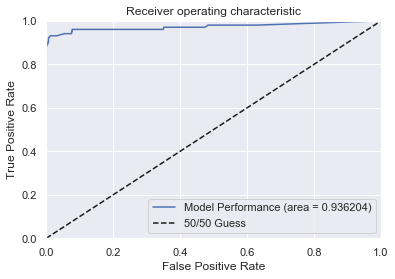

In [77]:
#We will now compare and see if resampling helped increase our ROC metrics

clf_auc_score = roc_auc_score(y_holdout,y_pred)
#print('The ROC AUC Score is {}.'.format(clf_auc_score))

fpr, tpr, _ = roc_curve(y_holdout,clf_probs[:,1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Model Performance (area = {:.6f})'.format(clf_auc_score),'50/50 Guess'],loc='lower right')
plt.title('Receiver operating characteristic')
plt.show()

### Our pipeline gave a ROC AUC score of 0.936 (rounding to three significant figures), and can be seen graphically above. As mentioned earlier in this analysis, we can also explore feature importance in the Random Forest model. This is shown in the bar graph below, with the most important feature at the top.

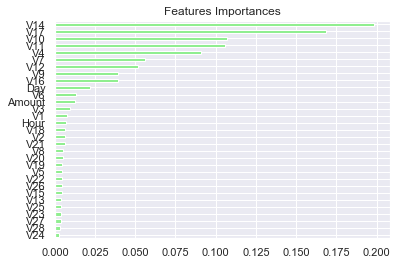

In [78]:
#We can also use random forest, which has been added with parameters to steps above. In doing so we may analyze what the
#classifier learns to be the most important feature

importances = pd.Series(data=p1.steps[1][1].feature_importances_,
                        index= X.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh',color='lightgreen')
plt.title('Features Importances')
plt.show()

### The parameters of our model can be tuned furhter.  To do so we use he grid search function of Scikit-Learn.

In [79]:
#Lets perform a grid search to tune some of the paramaters

# from sklearn.model_selection import GridSearchCV

# clf = RandomForestClassifier(n_estimators=20,max_depth=20,max_features=4)
# smt = SMOTE(random_state=42,k_neighbors=12,sampling_strategy='minority',ratio=0.25)


# #p1 = Pipeline([('ros',ros),('clf',clf)])
# p2 = Pipeline([('smt',smt),('clf',clf)])

# param_grid = {'clf__n_estimators':[5,10,15], 'clf__max_depth':np.arange(15,20),'smt__k_neighbors':np.arange(5,10),
#               'smt__ratio':np.linspace(0.05,0.45,10)}

# search = GridSearchCV(p2,param_grid,scoring='roc_auc',iid=False,cv=5)

# search.fit(X,y)

# print('Best parameter (CV score = {:.3f}):'.format(search.best_score_))
# print(search.best_params_)

### Using 5 fold cross validation in a grid search of the RandomForestClassifier max_depth, n_estimators, and SMOTE with k_neighbors and ratio we found:

### Best parameter (CV score = 0.975):
### {'clf__max_depth': 16, 'clf__n_estimators': 15, 'smt__k_neighbors': 7, 'smt__ratio': 0.1388888888888889}

### These parameters can be used to train on the entire test data, and then we can score on our holdout data. The performance of the parameter space can be seen below, as we saved our grid search result into a dataframe (grid search can be time costly depending on the size of the parameter space searched).

In [80]:
clf = RandomForestClassifier(n_estimators=15,max_depth=16,max_features=4, random_state = 42)
smt = SMOTE(random_state=42,k_neighbors=7,sampling_strategy='minority',ratio=0.14)


p2 = Pipeline([('smt',smt),('clf',clf)])

p2.fit(X,y)

Pipeline(memory=None,
         steps=[('smt',
                 SMOTE(k_neighbors=7, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=0.14,
                       sampling_strategy=0.14, svm_estimator='deprecated')),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=16,
                                        max_features=4, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=15, n_jobs=None,
                                        oob_score=False, random_state=42,
           

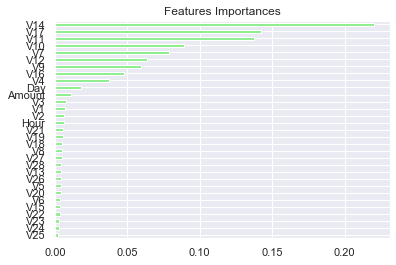

In [81]:
#Lets look at the feature importance of the our best estimator
importances = pd.Series(data=p2.steps[1][1].feature_importances_,
                        index= X.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh',color='lightgreen')
plt.title('Features Importances')
plt.show()

### The best grid search model has similarity in feature importance to our basic Random Forest model.

In [82]:
#Predict using best grid model on the holdout data
clf_probs = p2.predict_proba(X_holdout)
y_pred = p2.predict(X_holdout)

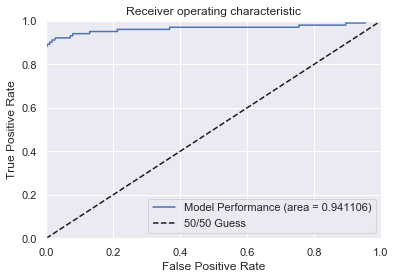

In [83]:
clf_auc_score = roc_auc_score(y_holdout,y_pred)
#print('The ROC AUC Score is {}.'.format(clf_auc_score))

fpr, tpr, _ = roc_curve(y_holdout,clf_probs[:,1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Model Performance (area = {:.6f})'.format(clf_auc_score),'50/50 Guess'],loc='lower right')
plt.title('Receiver operating characteristic')
plt.show()

### The ROC AUC score for our best grid search model outperformed the previous model, achieving a score of 0.9411. Both scores come from testing on the unseen holdout data.

### The parameter space of our grid search is shown below.

In [84]:
search_cv_df = pd.read_csv('random_forest_grid_search_11252019_5fold.csv')
search_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__n_estimators,param_smt__k_neighbors,param_smt__ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.498266,0.179992,0.072564,0.002958,15,5,5,0.050000,"{'clf__max_depth': 15, 'clf__n_estimators': 5,...",0.965840,0.931254,0.972151,0.973028,0.916674,0.951789,0.023315,305
1,7.510181,0.366624,0.076394,0.004272,15,5,5,0.094444,"{'clf__max_depth': 15, 'clf__n_estimators': 5,...",0.964373,0.943586,0.955629,0.960867,0.954305,0.955752,0.007080,201
2,7.267418,0.309105,0.070575,0.004593,15,5,5,0.138889,"{'clf__max_depth': 15, 'clf__n_estimators': 5,...",0.957923,0.926297,0.966984,0.921561,0.943850,0.943323,0.017531,496
3,7.265842,0.327171,0.068577,0.001604,15,5,5,0.183333,"{'clf__max_depth': 15, 'clf__n_estimators': 5,...",0.959469,0.935887,0.981669,0.961673,0.919851,0.951710,0.021552,310
4,7.470993,0.229389,0.073200,0.006305,15,5,5,0.227778,"{'clf__max_depth': 15, 'clf__n_estimators': 5,...",0.955307,0.933657,0.942558,0.953498,0.900305,0.937065,0.019979,618


In [85]:
search_cv_df[search_cv_df.rank_test_score == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__n_estimators,param_smt__k_neighbors,param_smt__ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
272,19.9962,0.103595,0.160003,0.008412,16,15,7,0.138889,"{'clf__max_depth': 16, 'clf__n_estimators': 15...",0.985903,0.953391,0.976671,0.980026,0.977114,0.974621,0.011114,1


In [86]:
print('The grid search tested {} cases using 5 fold validation.'.format(search_cv_df.rank_test_score.max()))

The grid search tested 750 cases using 5 fold validation.


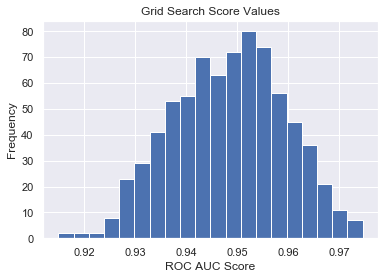

In [87]:
#Here we check a histogram of the mean test score (roc_auc) for all grid search trials
search_cv_df.mean_test_score.hist(bins=20)
plt.xlabel('ROC AUC Score')
plt.ylabel('Frequency')
plt.title('Grid Search Score Values')
plt.show()

In [88]:
#Lets explore some of the grid search output a little more in depth
search_cv_df.groupby('param_clf__max_depth').mean_test_score.mean().sort_values(ascending=False)


param_clf__max_depth
15    0.954672
16    0.950047
17    0.946725
18    0.945691
19    0.944379
Name: mean_test_score, dtype: float64

In [89]:
search_cv_df.groupby('param_clf__n_estimators').mean_test_score.mean().sort_values(ascending=False)

param_clf__n_estimators
15    0.957285
10    0.949885
5     0.937738
Name: mean_test_score, dtype: float64

### The confusion matrix for the best model from our grid search is shown below. It missed 13 fraud transactions, and misclassified 7 normal transactions as fraud when tested on our holdout data.

In [90]:
pd.crosstab(y_holdout, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,56852,8,56860
1,12,90,102
All,56864,98,56962


### Let's compare our ECDF to the top 10 features found by our random forest grid search model.

In [91]:
feature_importance_list = importances.sort_values(ascending=False).index.to_list()
df[['Class']+feature_importance_list].iloc[:,0:11]

,Class,V14,V17,V11,V10,V7,V12,V9,V16,V4,Day
0,0,-0.311169,0.207971,-0.551600,0.090794,0.239599,-0.617801,0.363787,-0.470401,1.378155,0
1,0,-0.143772,-0.114805,1.612727,-0.166974,-0.078803,1.065235,-0.255425,0.463917,0.448154,0
2,0,-0.165946,1.109969,0.624501,0.207643,0.791461,0.066084,-1.514654,-2.890083,0.379780,0
3,0,-0.287924,-0.684093,-0.226487,-0.054952,0.237609,0.178228,-1.387024,-1.059647,-0.863291,0
4,0,-1.119670,-0.237033,-0.822843,0.753074,0.592941,0.538196,0.817739,-0.451449,0.403034,0
...,...,...,...,...,...,...,...,...,...,...,...
284802,0,4.626942,1.991691,-1.593105,4.356170,-4.918215,2.711941,1.914428,1.107641,-2.066656,1
284803,0,-0.675143,-0.025693,-0.150189,-0.975926,0.024330,0.915802,0.584800,-0.711757,-0.738589,1
284804,0,-0.510602,0.313502,0.411614,-0.484782,-0.296827,0.063119,0.432454,0.140716,-0.557828,1
284805,0,0.449624,0.509928,-1.933849,-0.399126,-0.686180,-0.962886,0.392087,-0.608577,0.689799,1


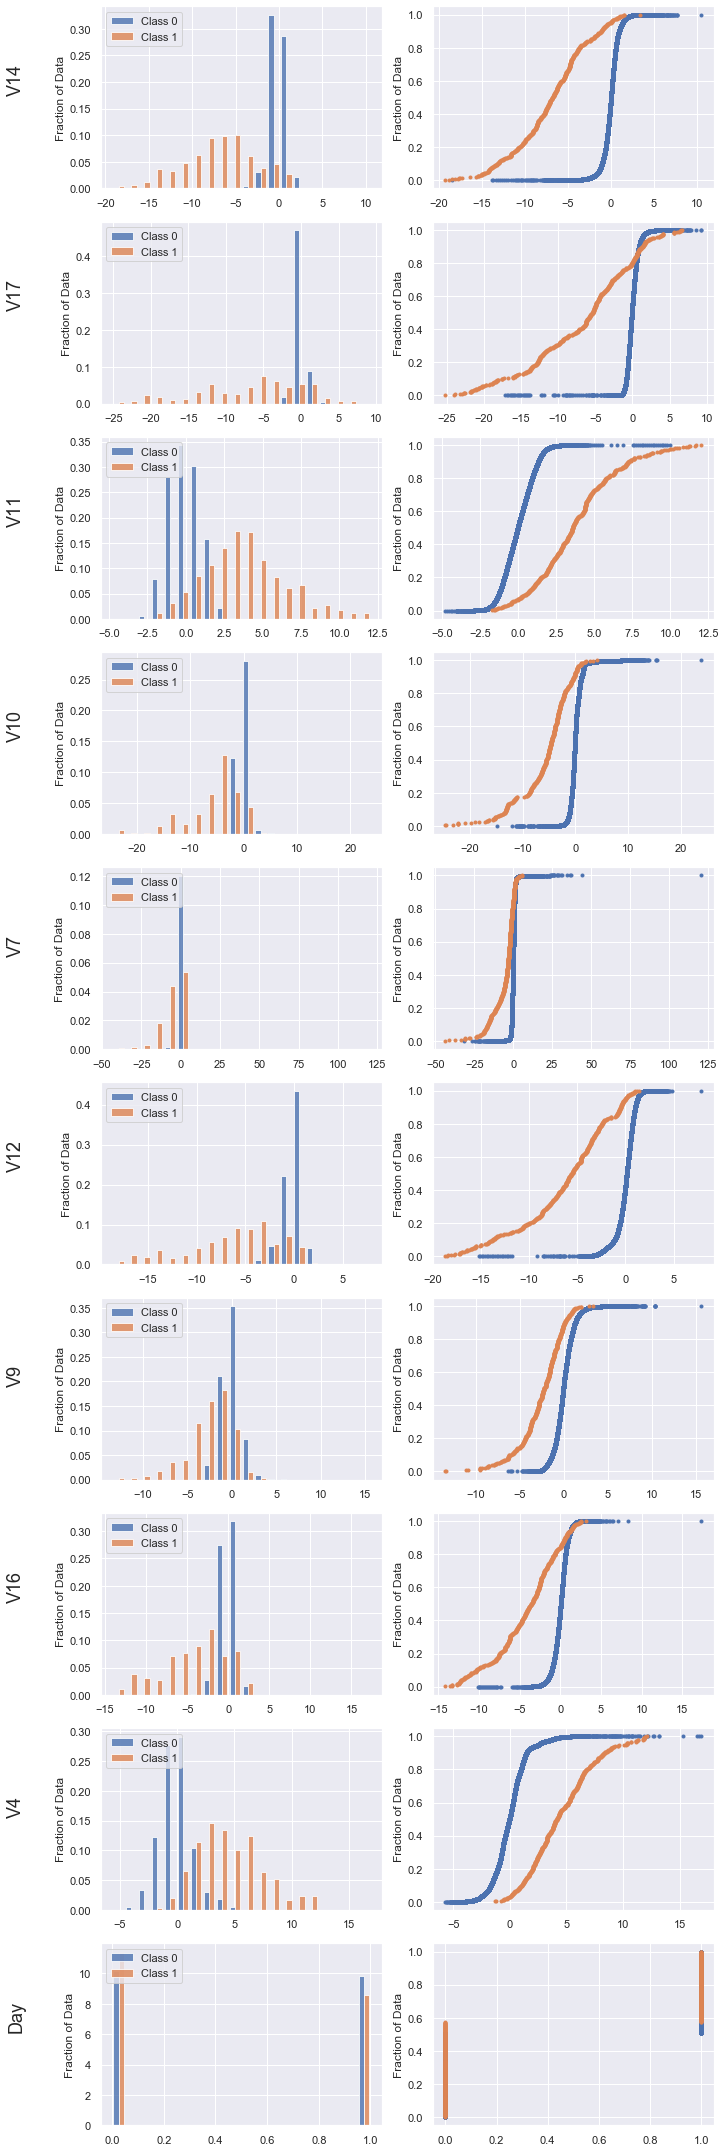

In [92]:
ecdf_compare(df[['Class']+feature_importance_list].iloc[:,0:11])

### The majority of the top features used in the Random Forest classifier have significantly different ECDF's between the non-fraud and fraud classes. This is yet another reminder that careful EDA can produce insights before any machine learning process is pursued.

### The final thing we wish to probe in this analysis is a deeper dive on the Random Forest parameters and feature importance. We will perform a 3 fold grid search this time, keeping the oversampling parameters the same. Due to the change in important features between our basic model and first grid search, this grid search will not limit the number of features used. We will search our new grid to see if we can't boost performance better than an ROC AUC of .936 on our holdout data.

In [93]:
# from sklearn.model_selection import GridSearchCV

# clf = RandomForestClassifier()
# smt = SMOTE(random_state=42,k_neighbors=7,sampling_strategy='minority',ratio=0.14)

# p3 = Pipeline([('smt',smt),('clf',clf)])

# param_grid = {'clf__n_estimators':[20,40,80,160,320,640,1280],'clf__max_depth':[2,4,8,16,32,64,128]}

# search = GridSearchCV(p3,param_grid,scoring='roc_auc',iid=False,cv=3)

# search.fit(X,y)

# print('Best parameter (CV score = {:.6f}):'.format(search.best_score_))
# print(search.best_params_)

### Using 3 fold corssvalidation, while testing n_estimators and max_depth received:

### Best parameter (CV score = 0.981685):
### {'clf__max_depth': 8, 'clf__n_estimators': 160}

In [94]:
# new_search_df = pd.DataFrame(search.cv_results_)
# pd.DataFrame.to_csv(new_search_df,'random_forest_grid_search_12042019_3fold.csv')

In [95]:
search_cv_df = pd.read_csv('random_forest_grid_search_12042019_3fold.csv')
print('The grid search tested over {} cases using 3 fold validation.'.format(search_cv_df.rank_test_score.max()))

The grid search tested over 49 cases using 3 fold validation.


In [96]:
search_cv_df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,5.573665,0.151298,0.169683,0.012388,2,20,"{'clf__max_depth': 2, 'clf__n_estimators': 20}",0.958628,0.950865,0.954354,0.954616,0.003175,47
1,1,10.683711,0.184016,0.278669,0.040614,2,40,"{'clf__max_depth': 2, 'clf__n_estimators': 40}",0.962794,0.947070,0.956690,0.955518,0.006472,45
2,2,20.278795,0.068775,0.464962,0.009647,2,80,"{'clf__max_depth': 2, 'clf__n_estimators': 80}",0.966443,0.962227,0.975119,0.967930,0.005367,33
3,3,40.119647,0.315377,0.859020,0.034655,2,160,"{'clf__max_depth': 2, 'clf__n_estimators': 160}",0.966244,0.955634,0.969955,0.963944,0.006068,39
4,4,79.705653,0.654293,1.622319,0.025141,2,320,"{'clf__max_depth': 2, 'clf__n_estimators': 320}",0.966513,0.952957,0.976669,0.965380,0.009714,36
5,5,159.254869,1.613914,3.198014,0.026490,2,640,"{'clf__max_depth': 2, 'clf__n_estimators': 640}",0.967523,0.952584,0.977118,0.965742,0.010095,35
6,6,319.779643,1.771599,6.458447,0.239722,2,1280,"{'clf__max_depth': 2, 'clf__n_estimators': 1280}",0.964276,0.953789,0.976824,0.964963,0.009417,37
7,7,9.606334,0.093504,0.169316,0.004041,4,20,"{'clf__max_depth': 4, 'clf__n_estimators': 20}",0.965765,0.961858,0.978182,0.968602,0.006960,31
8,8,18.747711,0.172151,0.304981,0.011442,4,40,"{'clf__max_depth': 4, 'clf__n_estimators': 40}",0.971107,0.964882,0.972128,0.969372,0.003203,29
9,9,36.963333,0.138856,0.540384,0.011808,4,80,"{'clf__max_depth': 4, 'clf__n_estimators': 80}",0.972021,0.968690,0.981874,0.974195,0.005597,22


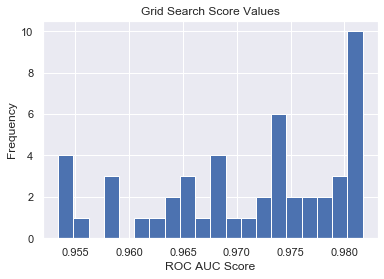

In [97]:
#Here we check a histogram of the mean test score (roc_auc) for all grid search trials
search_cv_df.mean_test_score.hist(bins=20)
plt.xlabel('ROC AUC Score')
plt.ylabel('Frequency')
plt.title('Grid Search Score Values')
plt.show()

In [98]:
clf = RandomForestClassifier(n_estimators=160,max_depth=8, random_state = 42)
smt = SMOTE(random_state=42,k_neighbors=7,sampling_strategy='minority',ratio=0.14)

p3 = Pipeline([('smt',smt),('clf',clf)])

p3.fit(X,y)

Pipeline(memory=None,
         steps=[('smt',
                 SMOTE(k_neighbors=7, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=0.14,
                       sampling_strategy=0.14, svm_estimator='deprecated')),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=8,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=160, n_jobs=None,
                                        

In [99]:
#Predict using best grid model on the holdout data
clf_probs = p3.predict_proba(X_holdout)
y_pred = p3.predict(X_holdout)

In [100]:
pd.crosstab(y_holdout, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,56833,27,56860
1,12,90,102
All,56845,117,56962


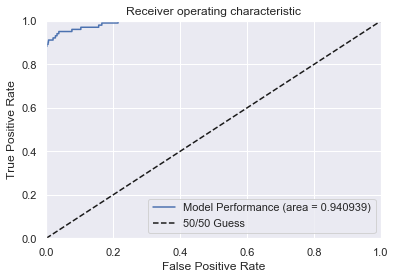

In [101]:
clf_auc_score = roc_auc_score(y_holdout,y_pred)
#print('The ROC AUC Score is {}.'.format(clf_auc_score))

fpr, tpr, _ = roc_curve(y_holdout,clf_probs[:,1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Model Performance (area = {:.6f})'.format(clf_auc_score),'50/50 Guess'],loc='lower right')
plt.title('Receiver operating characteristic')
plt.show()

### Tuning the number of trees in our forest, as well as the depth of each tree, gives a very similar ROC AUC score of 0.94. This is exact to three significant digits when compared to the first grid search model we performed. Under the current random state it appears we are not significantly improving our scoring metric with these model parameters.

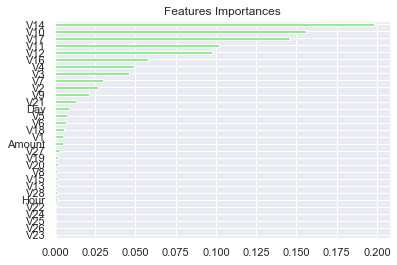

In [102]:
#Lets look at the feature importance of the our best estimator
importances = pd.Series(data=p3.steps[1][1].feature_importances_,
                        index= X.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh',color='lightgreen')
plt.title('Features Importances')
plt.show()

### The newly tuned model again has V14 as the most important feature in classifying between Fraud and Non-Fraud samples in our current analysis. The final thing we will pursue in this analysis will be a more focused on feature importance.

### To do so we will compare the ROC AUC score using our tuned Random Forest Classifier for a feature set that has a single column removed. In this way we will test whether the dropped column hurts or improves the performance of our model. We will test this for each column in our feature set.

### To learn the importance of our given features we test them one at a time. Our method will modify upon ideas shared by erykml on GitHub (gist.github.com/erykml/6854134220276b1a50862aa486a44192). In this analysis we will continue to use the ROC AUC method of scoring, as well as cloning our Random Forest model. We will aim our feat_imp portance at training with the same X,y data we have been handling while computing the final score on the holdout data.

In [103]:
from sklearn.base import clone

In [104]:
def feat_imp(model, X_train, y_train,X_test,y_test,random_state=42):
    
    #Find the benchmark score using ROC AUC using all features. We will use a pipeline here, while cloning a random forest
    #classifier model
    model_clone = clone(model)
    model_clone.random_state = random_state
    smt = SMOTE(random_state=42,k_neighbors=7,sampling_strategy='minority',ratio=0.14)
    p_clone = Pipeline([('smt',smt),('clf_clone',model_clone)])
    p_clone.fit(X_train,y_train)
    
    y_pred_clone = p_clone.predict(X_test)
    clone_benchmark_auc_score = roc_auc_score(y_test,y_pred_clone)
    
    #Store the features
    importances = []
    
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        p_clone = Pipeline([('smt',smt),('clf_clone',model_clone)])
        p_clone.fit(X_train.drop(col,axis=1),y_train)
        
        y_pred_clone = p_clone.predict(X_test.drop(col,axis=1))
        drop_col_auc_score = roc_auc_score(y_test,y_pred_clone)
        
        importances.append(drop_col_auc_score - clone_benchmark_auc_score)
        
    #Create dataframe containing our results 
    importances_df = pd.DataFrame({'feature':X_train.columns,'feature_importance':importances})
    importances_df = importances_df.sort_values('feature_importance',ascending = False).reset_index(drop=True)
    mask = importances_df.feature_importance>0
    importances_df['Drop'] = ['Yes' if item==True else 'No' for item in mask]
    
    
    #Create a bar plot showing visually which dropped columns improve/decrease ROC AUC score
    importances_df.plot.barh(x='feature',y='feature_importance',color='blue',figsize=(6, 6),legend=False)
    x_low = -importances_df.feature_importance.abs().max()
    x_high = importances_df.feature_importance.abs().max()
    plt.xticks([(x_low-0.5*(x_high-x_low))/2,0,(x_high+0.5*(x_high-x_low))/2], ['Decreased','0','Improved'])
    plt.xlim([x_low-0.5*(x_high-x_low),x_high+0.5*(x_high-x_low)])
    plt.title('Effect of Dropped Column on ROC AUC Score')
    plt.show()
    
    print('The maximum magnitude between ROC AUC scores for the most influencial dropped column is {:0.5f}.'.format(importances_df.feature_importance.abs().max()))
    
    return importances_df

    
    
    
    

### Carefully note the sign we have chosen in the above expression for the feature_importance. If it is positive this means that dropping a given feature improved ROC AUC scoring, and thus recommends that column should be dropped. If it is negative, removing the feature hurt the scoring and it should be kept to help improve the model.

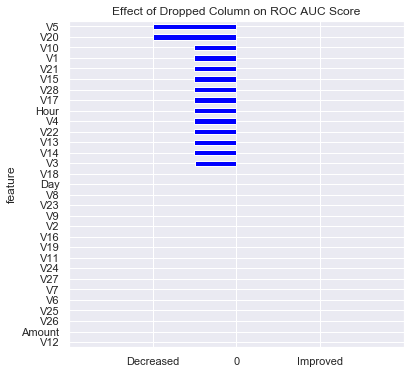

The maximum magnitude between ROC AUC scores for the most influencial dropped column is 0.00982.


In [105]:
clf_1 = RandomForestClassifier(n_estimators=15,max_depth=16,max_features=4, random_state = 42)

clf_1_feat_imp_df = feat_imp(clf_1,X,y,X_holdout,y_holdout)

### We can see from the bar plot and the way we have defined the sign of the difference between scores that dropping columns in all of the features decreased the ROC AUC score. However, we must remember in this model we set the max_features parameter in the Random Forest Classifier. Meaning each tree in the forest chooses 4 features out of the feature set to use in fitting a model.

### Instead, we should use this style of analysis on the second grid search model, that used more trees as well as all available features. Below we show the results for this experiment.

In [106]:
# clf_2 = RandomForestClassifier(n_estimators=160,max_depth=8, random_state = 42)

# clf_2_feat_imp_df = feat_imp(clf_2,X,y,X_holdout,y_holdout)

In [107]:
clf_2_feat_imp_df = pd.read_csv('160_tree_random_forest_feature_importance_rocauc.csv')

In [108]:
clf_2_feat_imp_df

,feature,feature_importance,Drop
0,V17,0.000062,Yes
1,V28,0.000053,Yes
2,V9,0.000053,Yes
3,V13,0.000044,Yes
4,V2,0.000044,Yes
5,V5,0.000044,Yes
6,V25,0.000035,Yes
7,V23,0.000035,Yes
8,V6,0.000035,Yes
9,V19,0.000035,Yes


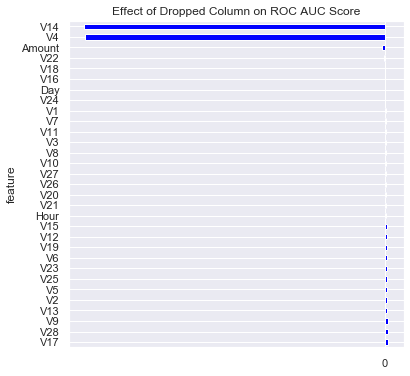

In [109]:
clf_2_feat_imp_df.plot.barh(x='feature',y='feature_importance',color='blue',figsize=(6, 6),legend=False)
plt.xscale('symlog')
plt.title('Effect of Dropped Column on ROC AUC Score')
plt.show()

In [110]:
recomend_drop_list = clf_2_feat_imp_df[clf_2_feat_imp_df.Drop == 'Yes'].feature.to_list()
X.drop(recomend_drop_list,axis=1)

,V4,V14,V16,V18,V22,Amount
249681,-1.914778,-0.996038,-0.498370,2.213535,-0.160441,19.61
241679,1.281573,-0.285012,-0.166353,-0.399939,-1.160340,53.99
55997,-1.354907,-0.351219,-0.158431,0.094491,1.016456,646.99
211827,-1.809611,-0.134247,0.941971,-1.500961,0.465379,143.00
252780,-2.836439,-0.659288,-0.042668,0.713765,0.682026,5.99
...,...,...,...,...,...,...
262172,-0.708321,-1.099358,0.165061,-0.326261,-0.908182,9.48
230202,-0.520952,-0.688479,0.369969,-1.275329,1.356617,350.00
211554,-0.360616,1.000923,-1.054182,0.305481,0.804004,78.49
261719,-0.620046,0.752740,0.165023,-0.576298,-0.730558,9.98


### We now test the accuracy by dropping the recommended features and running our best Random Forest Classifier again.

In [111]:
clf = RandomForestClassifier(n_estimators=160,max_depth=8, random_state = 42)
smt = SMOTE(random_state=42,k_neighbors=7,sampling_strategy='minority',ratio=0.14)

p4 = Pipeline([('smt',smt),('clf',clf)])

p4.fit(X.drop(recomend_drop_list,axis=1),y)

Pipeline(memory=None,
         steps=[('smt',
                 SMOTE(k_neighbors=7, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=0.14,
                       sampling_strategy=0.14, svm_estimator='deprecated')),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=8,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=160, n_jobs=None,
                                        

In [112]:
clf_probs = p4.predict_proba(X_holdout.drop(recomend_drop_list,axis=1))
y_pred = p4.predict(X_holdout.drop(recomend_drop_list,axis=1))

In [113]:
pd.crosstab(y_holdout, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,56812,48,56860
1,12,90,102
All,56824,138,56962


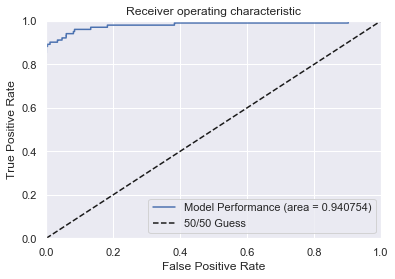

In [114]:
clf_auc_score = roc_auc_score(y_holdout,y_pred)
#print('The ROC AUC Score is {}.'.format(clf_auc_score))

fpr, tpr, _ = roc_curve(y_holdout,clf_probs[:,1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Model Performance (area = {:.6f})'.format(clf_auc_score),'50/50 Guess'],loc='lower right')
plt.title('Receiver operating characteristic')
plt.show()

### The score did not change significantly, but this should be expected due to the magnitude of the feature_importance values. None of the features were hurting the score drastically. However, since dropping the majority of the features we did decrease the time the model took to train. This is a positive result, keeping ROC AUC accuracy while decreasing resources (time in this case). On the downside we took a hit on our incorrectly classified non-fraud samples that were determined to be fraud from the model. In a real business setting we would have to set a threshold on how many of this type of error we would deem appropriate. For this current analysis and the dataset given we will take this as acceptable. The positives of a faster and just as accurate model outweigh the misclassifications, as in a real life case there would be some secondary process to check the samples classified as fraud. This would not hurt our analysis, as we still removed over 56,000 samples from the dataset correctly with relatively high scoring.